In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv('common_dataset.csv')

In [11]:
df.head(10)

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099790
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022200
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817440
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063890
5,5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430220
6,6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535870
7,7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541560
8,8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090340
9,9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962100


In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [14]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [16]:
bangalore_population.to_csv('population_dataset.csv')

In [17]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [18]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [19]:
bangalore_income.to_csv('income_dataset.csv')

In [20]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [21]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

In [22]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [23]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [24]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [25]:
borough_colors

{'Central': '#A87B75',
 'Eastern': '#C1AF4C',
 'NorthEastern': '#40B789',
 'Northern': '#41FBEC',
 'SouthEastern': '#D44A93',
 'Southern': '#55E1AF',
 'SouthernSuburbs': '#D5647C',
 'Western': '#777F17'}

In [26]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [27]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [28]:
bangalore_map

Exploring bangalore Neighborhoods using FourSquare API

In [29]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [30]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [31]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  586


In [32]:

bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
3,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
4,Cantonment area,Central,12.972442,77.580643,President's Groom Concepts (BVK),12.973916,77.578005,Boutique


In [33]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       110
Café                     33
Bakery                   27
Fast Food Restaurant     25
Ice Cream Shop           23
Department Store         20
Pizza Place              18
Coffee Shop              17
Chinese Restaurant       16
Restaurant               14
Name: Neighborhood, dtype: int64

In [34]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  122


In [35]:
#Getting number of venues per neighborhood
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [36]:
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             6
        Domlur                     12
        Indiranagar                64
        Jeevanbheemanagar           4
        Malleswaram                 6
...                               ...
Western Nagarbhavi                  5
        Nandini Layout              1
        Nayandahalli                3
        Rajarajeshwari Nagar        6
        Vijayanagar                 4

[61 rows x 1 columns]

In [37]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [38]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [39]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,6
1,Central,Domlur,12
2,Central,Indiranagar,64
3,Central,Jeevanbheemanagar,4
4,Central,Malleswaram,6
...,...,...,...
56,Western,Nagarbhavi,5
57,Western,Nandini Layout,1
58,Western,Nayandahalli,3
59,Western,Rajarajeshwari Nagar,6


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Electronic City'),
 Text(0, 0, 'HSR Lay

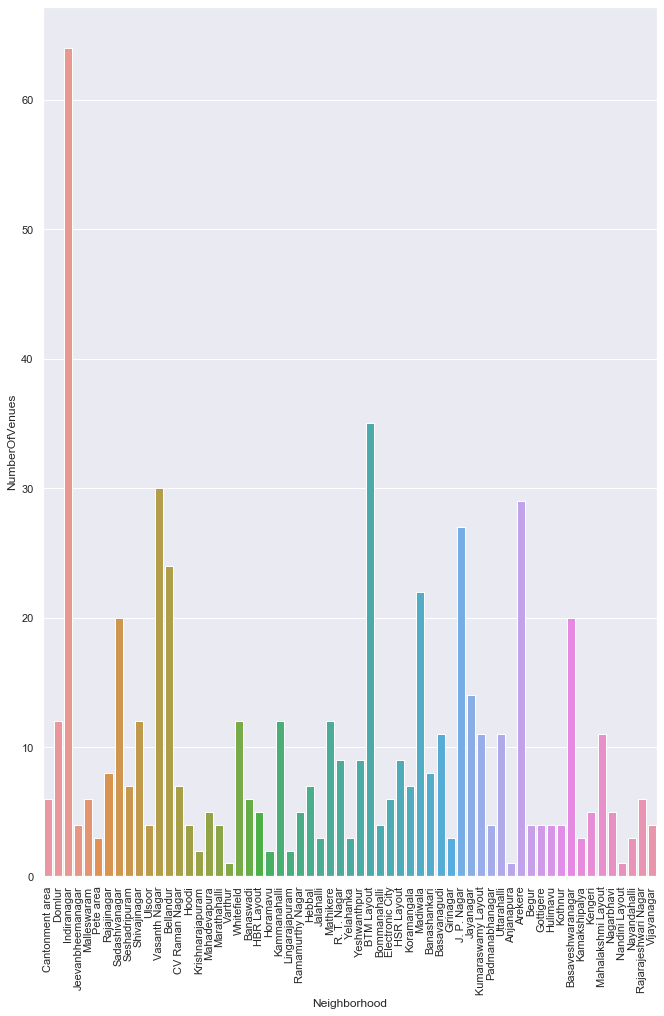

In [40]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

In [41]:
#Exploring Whitefield venues
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
223,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
224,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
225,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
226,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
227,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
228,Whitefield,Eastern,12.9698,77.7499,Stoner,12.968464,77.749499,Ice Cream Shop
229,Whitefield,Eastern,12.9698,77.7499,Bangalore Mandarin,12.969631,77.750130,Chinese Restaurant
230,Whitefield,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
231,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café
232,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant


In [42]:
#One hot encoding for letting us to compare different venues based on some common scale

bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [43]:
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,Venue Category_Bar,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
583,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store
0,Anjanapura,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,Arekere,0.000000,0.0,0.000000,0.0,0.034483,0.0,0.0,0.034483,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,BTM Layout,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.057143,...,0.0,0.0,0.000000,0.0,0.0,0.057143,0.0,0.000000,0.0,0.0
3,Banashankari,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,Banaswadi,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.166667,...,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Vasanth Nagar,0.000000,0.0,0.033333,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0
57,Vijayanagar,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.500000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
58,Whitefield,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.166667,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
59,Yelahanka,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [45]:
number_of_top_venues = 5

In [46]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                        Venue  Frequency
0          Venue Category_ATM        1.0
1          Venue Category_Pub        0.0
2   Venue Category_Playground        0.0
3  Venue Category_Pizza Place        0.0
4     Venue Category_Pharmacy        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.21
1  Venue Category_Sporting Goods Shop       0.14
2          Venue Category_Pizza Place       0.07
3     Venue Category_Department Store       0.07
4             Venue Category_Bus Line       0.03


--------- BTM Layout ---------
                                          Venue  Frequency
0              Venue Category_Indian Restaurant       0.23
1                 Venue Category_Ice Cream Shop       0.09
2             Venue Category_Chinese Restaurant       0.09
3                    Venue Category_Snack Place       0.09
4  Venue Category_Vegetarian / Vegan Restaurant       0.06


--------- 

                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.42
1     Venue Category_Convenience Store       0.08
2        Venue Category_Ice Cream Shop       0.08
3  Venue Category_Fast Food Restaurant       0.08
4           Venue Category_Pizza Place       0.08


--------- Nagarbhavi ---------
                                    Venue  Frequency
0        Venue Category_Indian Restaurant        0.2
1  Venue Category_South Indian Restaurant        0.2
2           Venue Category_Breakfast Spot        0.2
3                      Venue Category_Gym        0.2
4                     Venue Category_Café        0.2


--------- Nandini Layout ---------
                                          Venue  Frequency
0  Venue Category_Vegetarian / Vegan Restaurant        1.0
1                            Venue Category_ATM        0.0
2             Venue Category_Mughlai Restaurant        0.0
3                     Venue Category_Playground        0.0
4                

In [47]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [48]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Deli / Bodega,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,Venue Category_Liquor Store
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Sandwich Place,Venue Category_Fast Food Restaurant,Venue Category_Coffee Shop
3,Banashankari,Venue Category_Café,Venue Category_Men's Store,Venue Category_Clothing Store,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_North Indian Restaurant,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Donut Shop
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Women's Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store


In [49]:
neighborhoods_venues_sorted.shape

(61, 11)

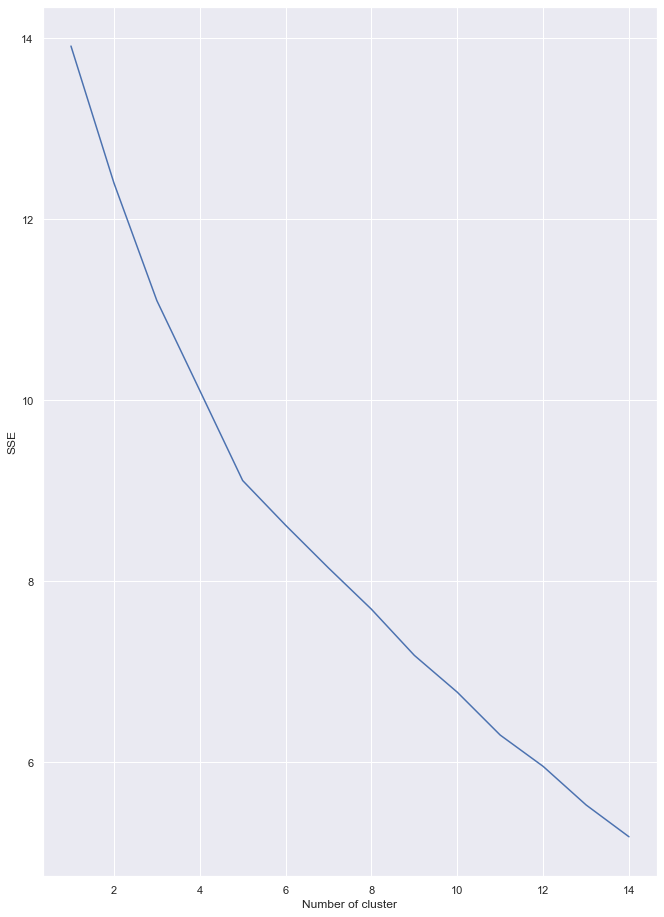

In [50]:
#Next challenge is to find the optimal k value for clustering and we do it using the elbow method
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [51]:
#From the above graph, we can see the optimal value for cluster is 5.
kmeans = KMeans(n_clusters=5,random_state=0)

In [52]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [53]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [54]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0     5
1     4
2    25
3     8
4    19
Name: Neighborhood, dtype: int64

In [55]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       'Venue Category_Badminton Court', 'Venue Category_Bakery',
       ...
       'Venue Category_Toll Plaza', 'Venue Category_Train Station',
       'Venue Category_Travel & Transport', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Wine Shop', 'Venue Category_Women's Store', 'Cluster'],
      dtype='object', length=124)

In [56]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [58]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Deli / Bodega,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Pizza Place,Venue Category_Bakery,Venue Category_Sandwich Place,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.057143,0.0,0.0,0.0,0.0,4
3,Banashankari,Venue Category_Café,Venue Category_Men's Store,Venue Category_Clothing Store,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_North Indian Restaurant,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2


In [59]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [60]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [61]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [62]:
map_clusters

# Finding similar locations based on user input (recommending location)
We need to analyze factors such as population and Income to recommend.

In [63]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [64]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [65]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [66]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099790,0.293051
1,Central,Domlur,56837.022200,0.879225
2,Central,Indiranagar,41991.817440,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063890,0.824047


In [67]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [68]:
#recommending Veg restaurants
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,2,0,0,0,0
3,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [69]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
     ..
56    1
57    0
58    0
59    0
60    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 61, dtype: uint8

In [70]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [71]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [72]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [73]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [74]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [75]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

# Building a target neighborhood by providing a sample restaurant : say ' Whitefield '

In [76]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [77]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,562,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Ice Cream Shop,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,563,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Ice Cream Shop,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,564,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Ice Cream Shop,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,565,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Ice Cream Shop,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,566,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Ice Cream Shop,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,567,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Ice Cream Shop,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Eastern,12.9698,77.7499,Stoner,12.968464,77.749499,Ice Cream Shop
6,568,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Ice Cream Shop,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Eastern,12.9698,77.7499,Bangalore Mandarin,12.969631,77.750130,Chinese Restaurant
7,569,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Ice Cream Shop,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
8,570,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Ice Cream Shop,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café
9,571,Whitefield,Venue Category_Bakery,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Ice Cream Shop,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Gym / Fitness Center,...,0.0,0.0,2,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant


In [78]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [79]:
target_cluster

2

In [80]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,...,0.0,0.0,2,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,...,0.0,0.0,2,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,...,0.0,0.0,2,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant
4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,...,0.0,0.0,2,SouthernSuburbs,12.8875,77.597,Pizza Hut,12.889420,77.597494,Pizza Place
5,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,...,0.0,0.0,2,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant


In [81]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 330 neighborhoods which has similar characteristics to Whitefield.


In [82]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Wine Shop,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,...,0.0,0.0,2,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,...,0.0,0.0,2,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
2,3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,...,0.0,0.0,2,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant
3,4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,...,0.0,0.0,2,SouthernSuburbs,12.8875,77.597,Pizza Hut,12.889420,77.597494,Pizza Place
4,5,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,...,0.0,0.0,2,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant


In [83]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

C:\Users\Vinaya\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now we need to create ranking by combining population and income factors as well?

In [84]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [85]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,...,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop,138760,0.141072,29378.71663,0.454466,0,1.0
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,...,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant,138760,0.141072,29378.71663,0.454466,0,1.0
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,...,Kababis,12.889605,77.597557,Indian Restaurant,138760,0.141072,29378.71663,0.454466,0,1.0
3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,...,Pizza Hut,12.889420,77.597494,Pizza Place,138760,0.141072,29378.71663,0.454466,0,1.0
4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Supermarket,Venue Category_Neighborhood,Venue Category_Business Service,Venue Category_Bus Line,Venue Category_Mughlai Restaurant,...,Guru Garden,12.891196,77.597979,Indian Restaurant,138760,0.141072,29378.71663,0.454466,0,1.0


In [86]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [87]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Banashankari,Venue Category_Café,Venue Category_Men's Store,Venue Category_Clothing Store,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_North Indian Restaurant,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,12.926891,77.551068,Clothing Store,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
1,Banashankari,Venue Category_Café,Venue Category_Men's Store,Venue Category_Clothing Store,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_North Indian Restaurant,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,12.924959,77.550755,Pizza Place,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
2,Banashankari,Venue Category_Café,Venue Category_Men's Store,Venue Category_Clothing Store,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_North Indian Restaurant,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,12.926047,77.548575,Breakfast Spot,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
3,Banashankari,Venue Category_Café,Venue Category_Men's Store,Venue Category_Clothing Store,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_North Indian Restaurant,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,12.924896,77.545873,Café,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403
4,Banashankari,Venue Category_Café,Venue Category_Men's Store,Venue Category_Clothing Store,Venue Category_Pizza Place,Venue Category_Breakfast Spot,Venue Category_North Indian Restaurant,Venue Category_Indian Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,12.926094,77.550367,Indian Restaurant,810407,0.823908,57524.20953,0.889855,0,1.0,0.823403


In [88]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [89]:
top3_df = pd.DataFrame(top3).reset_index()

In [90]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,[0.32959888841798324]
1,Banashankari,Venue Category_Café,Venue Category_Men's Store,Venue Category_Clothing Store,[0.8234029969298623]
2,Basaveshwaranagar,Venue Category_Ice Cream Shop,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,[0.6426377807651088]


Here, according the data, we see that 'Begur,Hulimavu and kamakshipalya' are top 3 neighborhoods to find similar food to whitefield restaurant's veg food !
